In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Reemplaza con tus credenciales
client_id = "fbcc027e4a464e239fb45911a81f5103"
client_secret = "2dc10949ba6a436ebfc6979eab263668"

# Autenticación
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

In [ ]:
import pandas as pd

# Lista de IDs de las playlists (puedes agregar más IDs aquí)
playlist_ids = [
    "3zdxwTQrpdBbSWW0AAo9bK", # Ejemplo: la meva d'estrelletes rnb
    "1qcr3J1cHHDeeZmYvfDcOO",  
    "6atOP7u9r3NHlemVa2FmBa",  
    "6Xomhg7OlkFqsh31qDTGEv",
    "2OJemWctSEA6dXkBYK1Czd",
    "4Kb3D1UvDARKHBUzZguuLb",
    "644KTV9Q2LHxhewwTKk1Fj",
    #"4JSmsAazziRxrmNlmS8Lek",
    "3vAg3PErZK53Yncq63xK1d",
    "4PN4MV0i3xC4j0jS1vfc5I",
    "6s9yM8wqPPpABG4zqSEXUZ",
    "2UQKnU1aQWeTEsO0YrpMPD",
    "06P03btu9eXF6m36l43ewK",
    "5bLAtwJjs5jVyXruXfay7q",
    "3mECC4HNkIRqpsahV68cKL",
    "5a7w6B5lrmkPm2gt2RdbNJ",
    "1BsKEsRq6h7nLuWYQy1zIU",
    "15zXAw5C6wIdknsqpHUzVE",
    "5TGR44P9MHxJ12tmKIgep9",
    "4Tsu0dDQ6yqd6RH7x4mnRj",
    "1qcr3J1cHHDeeZmYvfDcOO",
    "2UXtFv4ZcGvZ2BRYzXA3od",
    #"36P07bti6xD99o7S1acmin",
    "70GPrZeJAfImROk74f46hw",
    "42NNIID5ZZEu8hqu8LAe3O",
    "7kDrUlVo1NrFMoRfB0gTQz",
    "0W7gY222Imr5WfJY19lK8Y",
    "37TxwGiyOuQo9tadl8OLTV",
    "2a3ib9QH7a4F6foXo6r550",
    "5qpSKrWeysuhBhVCmvX5i6",
    "7MRAWP7PShm6kIcM5VE1IV",
    "0sSWYSlbP6fE63uWW1JZ6J",
    "0PkMMdSyNnt48Kio7tx62Y",
    "37i9dQZF1DXcBWIGoYBM5M",
    "37i9dQZF1EQqA6klNdJvwx",
    "2PdmcJWAzJjtxGtYh8z4KS",
    "62LEXLd4WeykYzhiKon4Zy",
    "37i9dQZF1EIW0gmEV4Vhyx",
    "33nieyXyL3onz746ugD5Rl",
    "1cknnbX1spRmGMfbZtPKnU",
    "2VNvIs8tloBq3k3NUA2moW",
    "15sCPWengPf60iVLz5qaLK",
    "6rfXIVvZJVh8QrpQOZhTlj",
    "3dgpO6mDWzdpMhyttrVi9t",
    "48IvzHbLovDHoKqLuVr6dx",
    "484JNvDhzT91mGVPAfBN2X",
    #"6PVHgTRAz4bWZTHxtfxTMI",
    #"6wCzIfSy44U7zGKMMFVMXX",
    #"3sRzqiKsbdfSsfdnbs1GCo",
    #"2aBcEWYEVC6Ixrq6LplhBa",
    #"67PSoDpOClPS03QyHTH25I",
    #"0uTUGjZlempgssx8bgqPjN",
    #"3YMgY4XpWT2ufOD9v5RVRM",
    #"4OsHYgrnqofCbrfCHyRIha",
    #"3b9oXkDVvIKI7k6mgH6P9s",
    #"1PorzXCwcY6MnGAFbmK71j",
    #"1d35rtHvmKx6SlgXrWWTvU",
    #"0pec261LL35roNnG4imVzL",
    #"6uIQIn3NdpTagDvzisThR3",
    #"0vqjgIu3edrNLcej0CNqXi"

]

# Lista para almacenar los datos de todas las playlists
all_data = []

# Conjunto para almacenar los IDs de las canciones procesadas y evitar duplicados
processed_ids = set()

# Recorrer cada playlist
for playlist_id in playlist_ids:
    # Obtener canciones de la playlist
    results = spotify.playlist_tracks(playlist_id)
    tracks = results['items']
    
    # Extraer los IDs de las canciones
    track_ids = [track['track']['id'] for track in tracks if track['track']]

    # Dividir los IDs en lotes de hasta 100 (Spotify API permite máximo 100 canciones por solicitud)
    chunk_size = 100
    chunks = [track_ids[i:i + chunk_size] for i in range(0, len(track_ids), chunk_size)]

    # Obtener características de audio para cada lote
    for chunk in chunks:
        audio_features = spotify.audio_features(chunk)
        
        for feature in audio_features:
            if feature:
                # Verificar si ya hemos procesado esta canción (comprobamos el ID)
                if feature['id'] not in processed_ids:
                    # Obtener nombre de la canción y el artista
                    track = spotify.track(feature['id'])
                    song_name = track['name']
                    artist_name = track['artists'][0]['name']  # Asumimos que hay un solo artista principal
                    popularity = track['popularity']
                    release_date = track['album']['release_date']  # Fecha de lanzamiento del álbum

                    # Obtener información del artista
                    artist_id = track['artists'][0]['id']
                    artist = spotify.artist(artist_id)  # Información del artista
                    genres = ", ".join(artist['genres'])  # Unir los géneros en una sola cadena


                    # Agregar los datos de la canción al listado
                    all_data.append({
                        "id": feature['id'],
                        "song_name": song_name,
                        "artist_name": artist_name,
                        "popularity": popularity,
                        "release_date": release_date,
                        "genres": genres,
                        "danceability": feature['danceability'],
                        "energy": feature['energy'],
                        "valence": feature['valence'],
                        "tempo": feature['tempo'],
                        "loudness": feature['loudness'],
                        "duration_ms": feature['duration_ms'],  # Duración en milisegundos
                        "key": feature['key'],  # Clave (0 = C, 1 = C#, ..., 11 = B)
                        "mode": feature['mode']  # Modo (0 = menor, 1 = mayor)
                    })

                    # Agregar el ID de la canción al conjunto para evitar duplicados
                    processed_ids.add(feature['id'])

# Convertir a DataFrame
df = pd.DataFrame(all_data)

# Guardar a CSV
df.to_csv("spotify_multiple_playlists_dataset_no_duplicates.csv", index=False)
print("Dataset guardado como spotify_multiple_playlists_dataset_no_duplicates.csv")

In [2]:
import pandas as pd
data = pd.read_csv("spotify_multiple_playlists_dataset_no_duplicates.csv")


In [3]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048 entries, 0 to 2047
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2048 non-null   object 
 1   song_name     2047 non-null   object 
 2   artist_name   2047 non-null   object 
 3   popularity    2048 non-null   int64  
 4   release_date  2048 non-null   object 
 5   genres        1926 non-null   object 
 6   danceability  2048 non-null   float64
 7   energy        2048 non-null   float64
 8   valence       2048 non-null   float64
 9   tempo         2048 non-null   float64
 10  loudness      2048 non-null   float64
 11  duration_ms   2048 non-null   int64  
 12  key           2048 non-null   int64  
 13  mode          2048 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 224.1+ KB
None
        popularity  danceability       energy      valence        tempo  \
count  2048.000000   2048.000000  2048.000000  2048.000000  2

In [4]:
data = data.dropna(subset=['song_name', 'artist_name'])  # Eliminar filas con valores nulos en estas columnas


In [5]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 2047 entries, 0 to 2047
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2047 non-null   object 
 1   song_name     2047 non-null   object 
 2   artist_name   2047 non-null   object 
 3   popularity    2047 non-null   int64  
 4   release_date  2047 non-null   object 
 5   genres        1926 non-null   object 
 6   danceability  2047 non-null   float64
 7   energy        2047 non-null   float64
 8   valence       2047 non-null   float64
 9   tempo         2047 non-null   float64
 10  loudness      2047 non-null   float64
 11  duration_ms   2047 non-null   int64  
 12  key           2047 non-null   int64  
 13  mode          2047 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 239.9+ KB
None
        popularity  danceability       energy      valence        tempo  \
count  2047.000000   2047.000000  2047.000000  2047.000000  2047.0

In [6]:
data['genres'] = data['genres'].fillna("unknown")  # Rellenar valores nulos en 'genres'

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2047 entries, 0 to 2047
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2047 non-null   object 
 1   song_name     2047 non-null   object 
 2   artist_name   2047 non-null   object 
 3   popularity    2047 non-null   int64  
 4   release_date  2047 non-null   object 
 5   genres        2047 non-null   object 
 6   danceability  2047 non-null   float64
 7   energy        2047 non-null   float64
 8   valence       2047 non-null   float64
 9   tempo         2047 non-null   float64
 10  loudness      2047 non-null   float64
 11  duration_ms   2047 non-null   int64  
 12  key           2047 non-null   int64  
 13  mode          2047 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 239.9+ KB
None


In [8]:
# Agrupar por canción y artista, y contar cuántas veces aparece cada combinación
duplicates = data.groupby(['song_name', 'artist_name']).size().reset_index(name='count')

# Filtrar combinaciones con más de un registro
duplicated_songs_artists = duplicates[duplicates['count'] > 1]

# Mostrar el número de duplicados y los detalles
print(f"Número de combinacions duplicades (song_name + artist_name): {len(duplicated_songs_artists)}")
print(duplicated_songs_artists)

Número de combinacions duplicades (song_name + artist_name): 63
                                              song_name    artist_name  count
144                                          BIZCOCHITO        ROSALÍA      2
150                                            BULERÍAS        ROSALÍA      2
151                         BULERÍAS DE UN CABALLO MALO   Ralphie Choo      2
263   Bridge Over Troubled Water (feat. John Legend ...  Jacob Collier      2
284                                               CANDY        ROSALÍA      2
...                                                 ...            ...    ...
1885                                        blind faith   Ralphie Choo      2
1928                           lamento de una supernova   Ralphie Choo      2
1939                                          my future  Billie Eilish      2
1970           we can't be friends (wait for your love)  Ariana Grande      2
1972                              when the party's over  Billie Eilish      2


In [9]:
# Agrupar por 'song_name' y 'artist_name' y quedarte con la fila de mayor popularidad
data_cleaned = (
    data.loc[data.groupby(['song_name', 'artist_name'])['popularity'].idxmax()]
)

# Verificar cambios
print(f"Número de filas originales: {len(data)}")
print(f"Número de filas después de limpiar duplicados: {len(data_cleaned)}")

# Opcional: mostrar las primeras filas
print(data_cleaned.head())
# Ordenar por el índice original
data_cleaned = data_cleaned.sort_index()

Número de filas originales: 2047
Número de filas después de limpiar duplicados: 1983
                          id  \
1412  0rQtoQXQfwpDW0c7Fw1NeM   
1408  6X7qcg95CAeJpTjtg1wooM   
811   01hAxLwlV3wFmAv48k24nf   
164   2JCTiiJQFWQNC0Zp8rsJRB   
1608  6NsrO4gen9oS2aQEQBUFQD   

                                              song_name    artist_name  \
1412                                            !!!!!!!  Billie Eilish   
1408                         &burn (with Vince Staples)  Billie Eilish   
811                  '03 Bonnie & Clyde (feat. Beyoncé)          JAY-Z   
164   (I've Had) The Time Of My Life - theme from th...    Bill Medley   
1608                                            + suave       rusowsky   

      popularity release_date  \
1412          18   2019-03-29   
1408          57   2017-12-22   
811            0   2003-03-10   
164           65   1988-10-03   
1608          22   2021-05-21   

                                                 genres  danceability  energy 

In [10]:
data_cleaned

,id,song_name,artist_name,popularity,release_date,genres,danceability,energy,valence,tempo,loudness,duration_ms,key,mode
0,34xTFwjPQ1dC6uJmleno7x,Godspeed,Frank Ocean,78,2016-08-20,"lgbtq+ hip hop, neo soul",0.399,0.0969,0.0758,109.540,-12.578,177922,6,1
2,2UJsKjM595pEyWUcd8JEIR,Fight For You - From the Original Motion Pictu...,H.E.R.,43,2021-02-04,"r&b, rap",0.695,0.6890,0.3920,95.013,-8.176,270710,2,1
3,0KS2h61pHQ4WmOwruD7uxD,Damage,H.E.R.,55,2020-10-21,"r&b, rap",0.646,0.6960,0.1800,81.336,-6.505,223415,1,1
4,2I88NEWpKrAPZuapXNV5G6,Belong to You (feat. 6LACK),Sabrina Claudio,55,2017-10-05,"alternative r&b, r&b",0.605,0.5530,0.6200,152.076,-10.845,185617,10,0
5,2UWnZrXLXIyfMgNvJr2KUa,By Any Means,Jorja Smith,50,2020-07-30,"r&b, uk contemporary r&b",0.750,0.4180,0.4420,104.981,-10.412,225631,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,4ia44V8FHR5GtRukYPQVOh,What if my heart beats faster?,Jorja Smith,41,2023-09-29,"r&b, uk contemporary r&b",0.476,0.3660,0.1770,130.831,-8.959,292040,6,0
2044,3WZn98ifY0D3WmnZWlVZRw,Finally - From the Original Motion Picture “Th...,Jorja Smith,24,2023-12-15,"r&b, uk contemporary r&b",0.595,0.7070,0.3250,135.918,-6.038,249413,4,1
2045,5s05UyOnot48MCSPmqQj33,Nice Body (feat. Jorja Smith),J Hus,29,2023-07-13,"afroswing, grime, uk hip hop",0.520,0.5280,0.2850,137.966,-7.549,214267,10,0
2046,1utTJXz5WzG0tONsJYKywl,darjeeling (feat jorja smith & unknown t),FKA twigs,44,2022-01-14,"afrofuturism, alternative r&b, art pop, escape...",0.500,0.4810,0.5160,193.885,-9.943,183667,1,1


In [11]:
# Paso 1: Extraer todos los géneros únicos
all_genres = data_cleaned['genres'].dropna().apply(lambda x: x.split(', ')).explode().unique()

# Crear un diccionario con IDs únicos para cada género
genre_id_map = {idx: genre for idx, genre in enumerate(all_genres)}

# Invertir el diccionario (opcional, si necesitas buscar por nombre)
genre_name_map = {genre: idx for idx, genre in genre_id_map.items()}

# Paso 2: Actualizar la columna 'genres' para que sea un diccionario con IDs y nombres
def map_genres_to_ids(genre_string):
    if pd.isnull(genre_string):
        return {}  # Si no hay género, devolver un diccionario vacío
    genres = genre_string.split(', ')
    return {genre_name_map[genre]: genre for genre in genres}

# Sobrescribir la columna 'genres'
data_cleaned['genres'] = data_cleaned['genres'].apply(map_genres_to_ids)

In [12]:
data_cleaned

,id,song_name,artist_name,popularity,release_date,genres,danceability,energy,valence,tempo,loudness,duration_ms,key,mode
0,34xTFwjPQ1dC6uJmleno7x,Godspeed,Frank Ocean,78,2016-08-20,"{0: 'lgbtq+ hip hop', 1: 'neo soul'}",0.399,0.0969,0.0758,109.540,-12.578,177922,6,1
2,2UJsKjM595pEyWUcd8JEIR,Fight For You - From the Original Motion Pictu...,H.E.R.,43,2021-02-04,"{2: 'r&b', 3: 'rap'}",0.695,0.6890,0.3920,95.013,-8.176,270710,2,1
3,0KS2h61pHQ4WmOwruD7uxD,Damage,H.E.R.,55,2020-10-21,"{2: 'r&b', 3: 'rap'}",0.646,0.6960,0.1800,81.336,-6.505,223415,1,1
4,2I88NEWpKrAPZuapXNV5G6,Belong to You (feat. 6LACK),Sabrina Claudio,55,2017-10-05,"{4: 'alternative r&b', 2: 'r&b'}",0.605,0.5530,0.6200,152.076,-10.845,185617,10,0
5,2UWnZrXLXIyfMgNvJr2KUa,By Any Means,Jorja Smith,50,2020-07-30,"{2: 'r&b', 5: 'uk contemporary r&b'}",0.750,0.4180,0.4420,104.981,-10.412,225631,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,4ia44V8FHR5GtRukYPQVOh,What if my heart beats faster?,Jorja Smith,41,2023-09-29,"{2: 'r&b', 5: 'uk contemporary r&b'}",0.476,0.3660,0.1770,130.831,-8.959,292040,6,0
2044,3WZn98ifY0D3WmnZWlVZRw,Finally - From the Original Motion Picture “Th...,Jorja Smith,24,2023-12-15,"{2: 'r&b', 5: 'uk contemporary r&b'}",0.595,0.7070,0.3250,135.918,-6.038,249413,4,1
2045,5s05UyOnot48MCSPmqQj33,Nice Body (feat. Jorja Smith),J Hus,29,2023-07-13,"{504: 'afroswing', 483: 'grime', 484: 'uk hip ...",0.520,0.5280,0.2850,137.966,-7.549,214267,10,0
2046,1utTJXz5WzG0tONsJYKywl,darjeeling (feat jorja smith & unknown t),FKA twigs,44,2022-01-14,"{19: 'afrofuturism', 4: 'alternative r&b', 62:...",0.500,0.4810,0.5160,193.885,-9.943,183667,1,1


In [13]:
print(genre_id_map)
# Cuenta cuántas veces aparece cada género
all_genres = data_cleaned['genres'].explode().value_counts()

# Muestra cada género con su respectiva cantidad de veces
print(all_genres)

{0: 'lgbtq+ hip hop', 1: 'neo soul', 2: 'r&b', 3: 'rap', 4: 'alternative r&b', 5: 'uk contemporary r&b', 6: 'atl hip hop', 7: 'contemporary r&b', 8: 'dance pop', 9: 'pop', 10: 'south carolina hip hop', 11: 'urban contemporary', 12: 'indie anthem-folk', 13: 'cali rap', 14: 'trap queen', 15: 'conscious hip hop', 16: 'hip hop', 17: 'west coast rap', 18: 'soul jazz', 19: 'afrofuturism', 20: 'post-teen pop', 21: 'pov: indie', 22: 'indie poptimism', 23: 'bedroom pop', 24: 'bedroom soul', 25: 'scandinavian r&b', 26: 'swedish soul', 27: 'canadian contemporary r&b', 28: 'hip pop', 29: 'electropop', 30: 'jazz cubano', 31: 'jazz trumpet', 32: 'latin jazz', 33: 'australian pop', 34: 'viral pop', 35: 'downtempo', 36: 'shiver pop', 37: 'queens hip hop', 38: 'motown', 39: 'soul', 40: 'edm', 41: 'electro house', 42: 'moombahton', 43: 'pop dance', 44: 'house', 45: 'progressive house', 46: 'uk dance', 47: 'comedy rap', 48: 'indie pop rap', 49: 'pop rap', 50: 'movie tunes', 51: 'southern hip hop', 52: 't

In [14]:
import numpy as np

# Generar valores aleatorios entre 2 y 5 para cada fila del dataset
data_cleaned['rating'] = np.random.uniform(2, 5, size=len(data_cleaned))

# Verificar los primeros valores del nuevo atributo
print(data_cleaned[['rating']].head())
data_cleaned

     rating
0  2.371929
2  3.563576
3  4.445545
4  3.709460
5  2.448509


,id,song_name,artist_name,popularity,release_date,genres,danceability,energy,valence,tempo,loudness,duration_ms,key,mode,rating
0,34xTFwjPQ1dC6uJmleno7x,Godspeed,Frank Ocean,78,2016-08-20,"{0: 'lgbtq+ hip hop', 1: 'neo soul'}",0.399,0.0969,0.0758,109.540,-12.578,177922,6,1,2.371929
2,2UJsKjM595pEyWUcd8JEIR,Fight For You - From the Original Motion Pictu...,H.E.R.,43,2021-02-04,"{2: 'r&b', 3: 'rap'}",0.695,0.6890,0.3920,95.013,-8.176,270710,2,1,3.563576
3,0KS2h61pHQ4WmOwruD7uxD,Damage,H.E.R.,55,2020-10-21,"{2: 'r&b', 3: 'rap'}",0.646,0.6960,0.1800,81.336,-6.505,223415,1,1,4.445545
4,2I88NEWpKrAPZuapXNV5G6,Belong to You (feat. 6LACK),Sabrina Claudio,55,2017-10-05,"{4: 'alternative r&b', 2: 'r&b'}",0.605,0.5530,0.6200,152.076,-10.845,185617,10,0,3.709460
5,2UWnZrXLXIyfMgNvJr2KUa,By Any Means,Jorja Smith,50,2020-07-30,"{2: 'r&b', 5: 'uk contemporary r&b'}",0.750,0.4180,0.4420,104.981,-10.412,225631,11,1,2.448509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,4ia44V8FHR5GtRukYPQVOh,What if my heart beats faster?,Jorja Smith,41,2023-09-29,"{2: 'r&b', 5: 'uk contemporary r&b'}",0.476,0.3660,0.1770,130.831,-8.959,292040,6,0,4.410652
2044,3WZn98ifY0D3WmnZWlVZRw,Finally - From the Original Motion Picture “Th...,Jorja Smith,24,2023-12-15,"{2: 'r&b', 5: 'uk contemporary r&b'}",0.595,0.7070,0.3250,135.918,-6.038,249413,4,1,3.300537
2045,5s05UyOnot48MCSPmqQj33,Nice Body (feat. Jorja Smith),J Hus,29,2023-07-13,"{504: 'afroswing', 483: 'grime', 484: 'uk hip ...",0.520,0.5280,0.2850,137.966,-7.549,214267,10,0,3.711062
2046,1utTJXz5WzG0tONsJYKywl,darjeeling (feat jorja smith & unknown t),FKA twigs,44,2022-01-14,"{19: 'afrofuturism', 4: 'alternative r&b', 62:...",0.500,0.4810,0.5160,193.885,-9.943,183667,1,1,2.844208


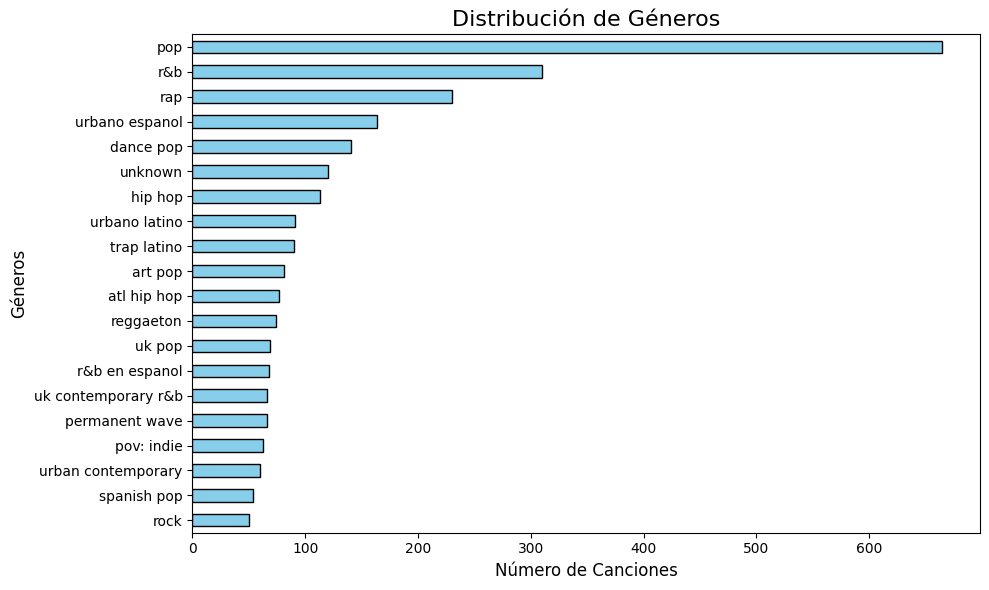

In [15]:
import matplotlib.pyplot as plt

def plot_genre_distribution(data, attribute, top_n=None):
    """
    Analiza y visualiza la distribución de géneros en un dataset.

    Args:
        data (DataFrame): El dataset que contiene los géneros.
        attribute (str): Nombre de la columna que contiene los géneros.
        top_n (int, opcional): Número máximo de géneros a mostrar.
    """
    # Contar la frecuencia de cada género
    genre_counts = (
        data[attribute]
        .apply(lambda x: list(x.values()) if isinstance(x, dict) else [])
        .explode()
        .value_counts()
    )
    
    # Mostrar solo los 'top_n' géneros más frecuentes (si se especifica)
    if top_n:
        genre_counts = genre_counts.head(top_n)

    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    genre_counts.sort_values(ascending=True).plot(
        kind='barh', color='skyblue', edgecolor='black'
    )
    plt.title("Distribución de Géneros", fontsize=16)
    plt.xlabel("Número de Canciones", fontsize=12)
    plt.ylabel("Géneros", fontsize=12)
    plt.tight_layout()
    plt.show()

# Usamos la función con tu dataset
plot_genre_distribution(data_cleaned, 'genres', top_n=20)

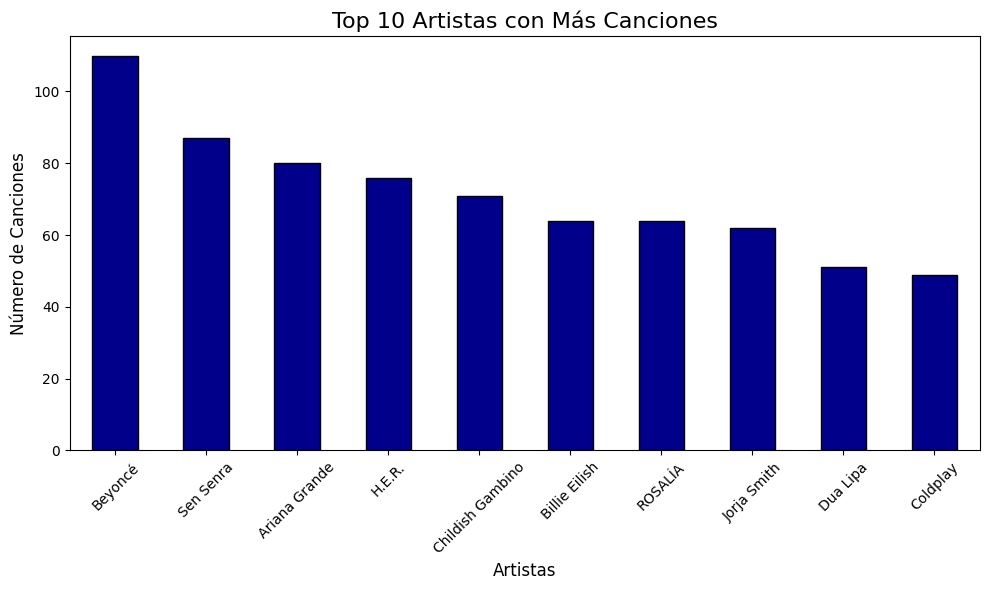

In [16]:
top_artists = data_cleaned['artist_name'].value_counts().head(10)

top_artists.plot(kind='bar', figsize=(10, 6), color='darkblue', edgecolor='black')
plt.title('Top 10 Artistas con Más Canciones', fontsize=16)
plt.xlabel('Artistas', fontsize=12)
plt.ylabel('Número de Canciones', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

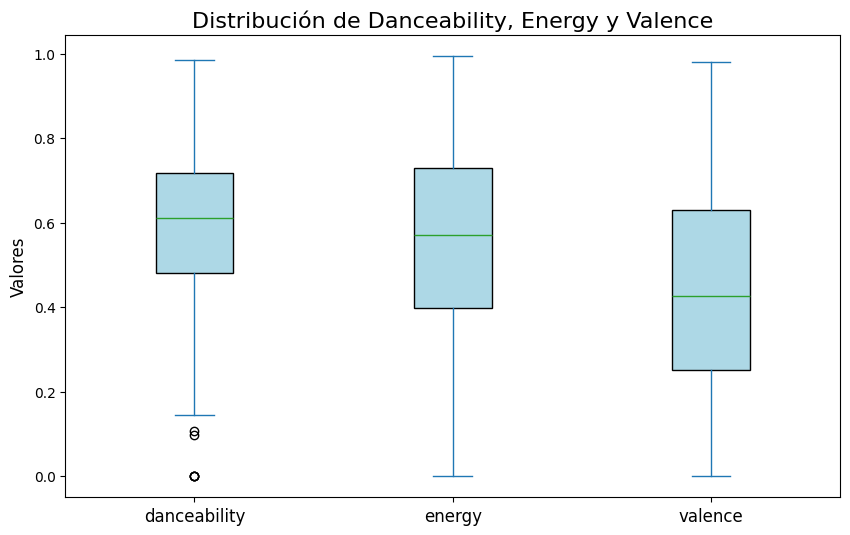

In [17]:
attributes = ['danceability', 'energy', 'valence']
data_cleaned[attributes].plot(kind='box', figsize=(10, 6), patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribución de Danceability, Energy y Valence', fontsize=16)
plt.ylabel('Valores', fontsize=12)
plt.xticks(range(1, len(attributes) + 1), attributes, fontsize=12)
plt.show()

In [27]:
import pandas as pd


# Lista de IDs de las playlists (puedes agregar más IDs aquí)
playlist_ids = [
    "2q2ewNIP4taPggnaZOSbg1",
    "5De5GXu8JDAzlW9Pil3lJ5",
    "1hrzqg0Rt9oPJag1pAoco1",
    "1cJu4SkwdEfCinMa6q5d8A",
    "4vcba4wPNpwTdpwdUNkqHp",
    "67Xxu6FtLJPPy9DJdhTcwL",
    "1VljVIgweFULjOLFlnWGWK",
    "3tTDJLgqy2AShfMwOHACn9",
    "108QjcGHw0m8ZSoJmMgFxa",
    "33gKx9h8DvVX1iHDD2MPD8",
    "0GOK62T0HJdIjNyHjyVxEC",
    "4XFyUD5aaHfLsqTO1RHQQ2",
    "7mwPA4fD1rALXfZAfFwyLP",
    "2i0Hn8zaDMEmX7CNqfSlbB",
    "1gyl6vALuOeBwirtRROTY0",
    "42t5KqHOorwGB6YidRKG4A",
    "0k34qGCkXnRBswAjvvkvhV",
    "6Qg6yLELvIiquSwGCy23qY",
    "37TxwGiyOuQo9tadl8OLTV",
    "1RHXpibAztQJCo0YawcqNR",
    "2psf51hoo81XAQYMTH6Yr8"
    

]

# Lista para almacenar los datos de todas las playlists
all_data = []

# Conjunto para almacenar los IDs de las canciones procesadas y evitar duplicados
processed_ids = set()

# Recorrer cada playlist
for playlist_id in playlist_ids:
    # Obtener canciones de la playlist
    results = spotify.playlist_tracks(playlist_id)
    tracks = results['items']
    
    # Extraer los IDs de las canciones
    track_ids = [track['track']['id'] for track in tracks if track['track']]

    # Dividir los IDs en lotes de hasta 100 (Spotify API permite máximo 100 canciones por solicitud)
    chunk_size = 100
    chunks = [track_ids[i:i + chunk_size] for i in range(0, len(track_ids), chunk_size)]

    # Obtener características de audio para cada lote
    for chunk in chunks:
        audio_features = spotify.audio_features(chunk)
        
        for feature in audio_features:
            if feature:
                # Verificar si ya hemos procesado esta canción (comprobamos el ID)
                if feature['id'] not in processed_ids:
                    # Obtener nombre de la canción y el artista
                    track = spotify.track(feature['id'])
                    song_name = track['name']
                    artist_name = track['artists'][0]['name']  # Asumimos que hay un solo artista principal
                    popularity = track['popularity']
                    release_date = track['album']['release_date']  # Fecha de lanzamiento del álbum

                    # Obtener información del artista
                    artist_id = track['artists'][0]['id']
                    artist = spotify.artist(artist_id)  # Información del artista
                    genres = ", ".join(artist['genres'])  # Unir los géneros en una sola cadena


                    # Agregar los datos de la canción al listado
                    all_data.append({
                        "id": feature['id'],
                        "song_name": song_name,
                        "artist_name": artist_name,
                        "popularity": popularity,
                        "release_date": release_date,
                        "genres": genres,
                        "danceability": feature['danceability'],
                        "energy": feature['energy'],
                        "valence": feature['valence'],
                        "tempo": feature['tempo'],
                        "loudness": feature['loudness'],
                        "duration_ms": feature['duration_ms'],  # Duración en milisegundos
                        "key": feature['key'],  # Clave (0 = C, 1 = C#, ..., 11 = B)
                        "mode": feature['mode']  # Modo (0 = menor, 1 = mayor)
                    })

                    # Agregar el ID de la canción al conjunto para evitar duplicados
                    processed_ids.add(feature['id'])

# Convertir a DataFrame
df = pd.DataFrame(all_data)

# Guardar a CSV
df.to_csv("spotify_adrian_dataset.csv", index=False)


In [18]:
import pandas as pd
data_adrian = pd.read_csv("spotify_adrian_dataset.csv")

print(data_adrian.info())
print(data_adrian.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            884 non-null    object 
 1   song_name     884 non-null    object 
 2   artist_name   884 non-null    object 
 3   popularity    884 non-null    int64  
 4   release_date  884 non-null    object 
 5   genres        841 non-null    object 
 6   danceability  884 non-null    float64
 7   energy        884 non-null    float64
 8   valence       884 non-null    float64
 9   tempo         884 non-null    float64
 10  loudness      884 non-null    float64
 11  duration_ms   884 non-null    int64  
 12  key           884 non-null    int64  
 13  mode          884 non-null    int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 96.8+ KB
None
       popularity  danceability      energy     valence       tempo  \
count  884.000000    884.000000  884.000000  884.000000  884.000000 

In [19]:
data_adrian['genres'] = data_adrian['genres'].fillna("unknown")  # Rellenar valores nulos en 'genres'
print(data_adrian.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            884 non-null    object 
 1   song_name     884 non-null    object 
 2   artist_name   884 non-null    object 
 3   popularity    884 non-null    int64  
 4   release_date  884 non-null    object 
 5   genres        884 non-null    object 
 6   danceability  884 non-null    float64
 7   energy        884 non-null    float64
 8   valence       884 non-null    float64
 9   tempo         884 non-null    float64
 10  loudness      884 non-null    float64
 11  duration_ms   884 non-null    int64  
 12  key           884 non-null    int64  
 13  mode          884 non-null    int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 96.8+ KB
None


In [20]:
# Agrupar por canción y artista, y contar cuántas veces aparece cada combinación
duplicates = data_adrian.groupby(['song_name', 'artist_name']).size().reset_index(name='count')

# Filtrar combinaciones con más de un registro
duplicated_songs_artists = duplicates[duplicates['count'] > 1]

# Mostrar el número de duplicados y los detalles
print(f"Número de combinacions duplicades (song_name + artist_name): {len(duplicated_songs_artists)}")
print(duplicated_songs_artists)

Número de combinacions duplicades (song_name + artist_name): 30
                                             song_name          artist_name  \
15                                                A Mí               Rels B   
16                                       A les fosques              Julieta   
38                                            Amorfoda            Bad Bunny   
53                                       Avions volant              Julieta   
59                         BULERÍAS DE UN CABALLO MALO         Ralphie Choo   
74                                            Believer      Imagine Dragons   
139                                         Chulo pt.2             Bad Gyal   
163                                          Cutthroat      Imagine Dragons   
167                                             DIABLA          Figa Flawas   
175                                             Demons      Imagine Dragons   
231                                    Enamorada de tu             

In [21]:
# Agrupar por 'song_name' y 'artist_name' y quedarte con la fila de mayor popularidad
data_adrian_cleaned = (
    data_adrian.loc[data_adrian.groupby(['song_name', 'artist_name'])['popularity'].idxmax()]
)

# Verificar cambios
print(f"Número de filas originales: {len(data_adrian)}")
print(f"Número de filas después de limpiar duplicados: {len(data_adrian_cleaned)}")

# Opcional: mostrar las primeras filas
print(data_adrian_cleaned.head())
# Ordenar por el índice original
data_adrian_cleaned = data_adrian_cleaned.sort_index()

Número de filas originales: 884
Número de filas después de limpiar duplicados: 854
                         id                     song_name      artist_name  \
603  6z39NC4VSSweBHFg9kAoja                            #1  Imagine Dragons   
701  4wcBRRpIfesgcyUtis7PEg  1 step forward, 3 steps back   Olivia Rodrigo   
102  1aUGxXCz9QimNkKeiJtzZ7                   105 F Remix            KEVVO   
227  3KJ3opyV29269SXkPrc19l                           120        Bad Bunny   
669  4K3j4RfU2P4EX1yuLJSdkB                            15  The Space Ocean   

     popularity release_date  \
603           0   2021-09-03   
701          76   2021-05-21   
102          66   2019-09-12   
227          72   2020-11-27   
669          44         2020   

                                                genres  danceability  energy  \
603                             modern rock, pop, rock         0.692   0.695   
701                                                pop         0.473   0.203   
102  reggaeton,

In [22]:
# Paso 1: Extraer todos los géneros únicos
all_genres = data_adrian_cleaned['genres'].dropna().apply(lambda x: x.split(', ')).explode().unique()

# Crear un diccionario con IDs únicos para cada género
genre_id_map = {idx: genre for idx, genre in enumerate(all_genres)}

# Invertir el diccionario (opcional, si necesitas buscar por nombre)
genre_name_map = {genre: idx for idx, genre in genre_id_map.items()}

# Paso 2: Actualizar la columna 'genres' para que sea un diccionario con IDs y nombres
def map_genres_to_ids(genre_string):
    if pd.isnull(genre_string):
        return {}  # Si no hay género, devolver un diccionario vacío
    genres = genre_string.split(', ')
    return {genre_name_map[genre]: genre for genre in genres}

# Sobrescribir la columna 'genres'
data_adrian_cleaned['genres'] = data_adrian_cleaned['genres'].apply(map_genres_to_ids)

In [23]:
data_adrian_cleaned

,id,song_name,artist_name,popularity,release_date,genres,danceability,energy,valence,tempo,loudness,duration_ms,key,mode
0,2Fxmhks0bxGSBdJ92vM42m,bad guy,Billie Eilish,81,2019-03-29,"{0: 'art pop', 1: 'pop'}",0.701,0.425,0.5620,135.128,-10.965,194088,7,1
1,46lvmzK8wxAy66tjzXXSh0,Tal Vez,Paulo Londra,60,2019-04-03,"{2: 'argentine hip hop', 3: 'trap argentino', ...",0.849,0.655,0.7600,161.966,-2.899,264483,8,1
3,2huX4MIVEWQtzCpu6B05SV,No Te Preocupes por Mi,Leiva,0,2018-12-14,"{6: 'cantautor', 7: 'latin arena pop', 8: 'spa...",0.313,0.608,0.3410,151.872,-5.746,228326,7,1
4,1mlGScrDQqHqmhdIqE8MmA,Besos En Guerra,Morat,76,2018-10-25,"{11: 'colombian pop', 12: 'latin viral pop'}",0.691,0.973,0.7830,143.961,-3.586,231533,2,1
5,04u9U3bDD9dVZFDDI8v0ME,Paraíso,Dvicio,51,2014-09-08,"{7: 'latin arena pop', 13: 'latin pop', 9: 'sp...",0.643,0.891,0.9330,87.989,-3.343,180653,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,23IqxRsToCo4Oj9w1pK3PT,EL TEU AMOR,xicu,16,2023-05-03,"{31: 'indie catala', 216: 'musica catalana'}",0.647,0.890,0.0393,130.947,-4.733,205629,4,0
880,0uB9gsssuj6l3XLi25ADYl,2+1,Judeline,55,2023-10-05,{26: 'urbano espanol'},0.723,0.583,0.5070,97.706,-5.903,157727,0,0
881,4EF1UDALNWdyJDWindWBqg,Sustancia,Judeline,52,2021-04-23,{26: 'urbano espanol'},0.651,0.374,0.0797,120.136,-15.033,173684,0,1
882,0tHzUXLKk7p0wzMZMMEl8y,CANIJO,Judeline,56,2023-06-15,{26: 'urbano espanol'},0.577,0.467,0.4100,84.410,-8.496,141587,2,0


In [25]:
import numpy as np

# Generar valores aleatorios entre 2 y 5 para cada fila del dataset
data_adrian_cleaned['rating'] = np.random.uniform(2, 5, size=len(data_adrian_cleaned))

# Verificar los primeros valores del nuevo atributo
print(data_adrian_cleaned[['rating']].head())
data_adrian_cleaned

     rating
0  2.197626
1  3.538708
3  4.876883
4  4.552396
5  3.740067


,id,song_name,artist_name,popularity,release_date,genres,danceability,energy,valence,tempo,loudness,duration_ms,key,mode,rating
0,2Fxmhks0bxGSBdJ92vM42m,bad guy,Billie Eilish,81,2019-03-29,"{0: 'art pop', 1: 'pop'}",0.701,0.425,0.5620,135.128,-10.965,194088,7,1,2.197626
1,46lvmzK8wxAy66tjzXXSh0,Tal Vez,Paulo Londra,60,2019-04-03,"{2: 'argentine hip hop', 3: 'trap argentino', ...",0.849,0.655,0.7600,161.966,-2.899,264483,8,1,3.538708
3,2huX4MIVEWQtzCpu6B05SV,No Te Preocupes por Mi,Leiva,0,2018-12-14,"{6: 'cantautor', 7: 'latin arena pop', 8: 'spa...",0.313,0.608,0.3410,151.872,-5.746,228326,7,1,4.876883
4,1mlGScrDQqHqmhdIqE8MmA,Besos En Guerra,Morat,76,2018-10-25,"{11: 'colombian pop', 12: 'latin viral pop'}",0.691,0.973,0.7830,143.961,-3.586,231533,2,1,4.552396
5,04u9U3bDD9dVZFDDI8v0ME,Paraíso,Dvicio,51,2014-09-08,"{7: 'latin arena pop', 13: 'latin pop', 9: 'sp...",0.643,0.891,0.9330,87.989,-3.343,180653,10,1,3.740067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,23IqxRsToCo4Oj9w1pK3PT,EL TEU AMOR,xicu,16,2023-05-03,"{31: 'indie catala', 216: 'musica catalana'}",0.647,0.890,0.0393,130.947,-4.733,205629,4,0,2.787146
880,0uB9gsssuj6l3XLi25ADYl,2+1,Judeline,55,2023-10-05,{26: 'urbano espanol'},0.723,0.583,0.5070,97.706,-5.903,157727,0,0,4.344304
881,4EF1UDALNWdyJDWindWBqg,Sustancia,Judeline,52,2021-04-23,{26: 'urbano espanol'},0.651,0.374,0.0797,120.136,-15.033,173684,0,1,3.229335
882,0tHzUXLKk7p0wzMZMMEl8y,CANIJO,Judeline,56,2023-06-15,{26: 'urbano espanol'},0.577,0.467,0.4100,84.410,-8.496,141587,2,0,4.540233


In [26]:
data_cleaned['user'] = 0
data_adrian_cleaned['user'] = 1

combined_dataset = pd.concat([data_cleaned, data_adrian_cleaned], ignore_index = True)
combined_dataset

,id,song_name,artist_name,popularity,release_date,genres,danceability,energy,valence,tempo,loudness,duration_ms,key,mode,rating,user
0,34xTFwjPQ1dC6uJmleno7x,Godspeed,Frank Ocean,78,2016-08-20,"{0: 'lgbtq+ hip hop', 1: 'neo soul'}",0.399,0.0969,0.0758,109.540,-12.578,177922,6,1,2.371929,0
1,2UJsKjM595pEyWUcd8JEIR,Fight For You - From the Original Motion Pictu...,H.E.R.,43,2021-02-04,"{2: 'r&b', 3: 'rap'}",0.695,0.6890,0.3920,95.013,-8.176,270710,2,1,3.563576,0
2,0KS2h61pHQ4WmOwruD7uxD,Damage,H.E.R.,55,2020-10-21,"{2: 'r&b', 3: 'rap'}",0.646,0.6960,0.1800,81.336,-6.505,223415,1,1,4.445545,0
3,2I88NEWpKrAPZuapXNV5G6,Belong to You (feat. 6LACK),Sabrina Claudio,55,2017-10-05,"{4: 'alternative r&b', 2: 'r&b'}",0.605,0.5530,0.6200,152.076,-10.845,185617,10,0,3.709460,0
4,2UWnZrXLXIyfMgNvJr2KUa,By Any Means,Jorja Smith,50,2020-07-30,"{2: 'r&b', 5: 'uk contemporary r&b'}",0.750,0.4180,0.4420,104.981,-10.412,225631,11,1,2.448509,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,23IqxRsToCo4Oj9w1pK3PT,EL TEU AMOR,xicu,16,2023-05-03,"{31: 'indie catala', 216: 'musica catalana'}",0.647,0.8900,0.0393,130.947,-4.733,205629,4,0,2.787146,1
2833,0uB9gsssuj6l3XLi25ADYl,2+1,Judeline,55,2023-10-05,{26: 'urbano espanol'},0.723,0.5830,0.5070,97.706,-5.903,157727,0,0,4.344304,1
2834,4EF1UDALNWdyJDWindWBqg,Sustancia,Judeline,52,2021-04-23,{26: 'urbano espanol'},0.651,0.3740,0.0797,120.136,-15.033,173684,0,1,3.229335,1
2835,0tHzUXLKk7p0wzMZMMEl8y,CANIJO,Judeline,56,2023-06-15,{26: 'urbano espanol'},0.577,0.4670,0.4100,84.410,-8.496,141587,2,0,4.540233,1


In [40]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
import statistics
from prettytable import PrettyTable

# Suponiendo que 'combined' es tu dataset combinado con las columnas necesarias
# Asegúrate de que 'userId', 'movieId' y 'rating' están en el DataFrame 'combined'
reader = Reader()
data_reader = Dataset.load_from_df(combined_dataset[["user", "id", "rating"]], reader)

# Usar el modelo SVD
svd = SVD()

# Realizar validación cruzada
results = cross_validate(svd, data_reader, measures=['RMSE', 'MAE'], cv=5)

# Calcular resultados de MAE
mae_results = list(map(lambda x: round(x, 2), results['test_mae']))
mae_mean = round(statistics.mean(mae_results), 2)
mae_std = round(statistics.stdev(mae_results), 4)

# Calcular resultados de RMSE
rmse_results = list(map(lambda x: round(x, 2), results['test_rmse']))
rmse_mean = round(statistics.mean(rmse_results), 2)
rmse_std = round(statistics.stdev(rmse_results), 4)

# Crear tabla para mostrar los resultados
results_table = PrettyTable()
results_table.field_names = ["Metric", "Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5", "Mean", "Std"]
results_table.add_row(["MAE"] + mae_results + [mae_mean, mae_std])
results_table.add_row(["RMSE"] + rmse_results + [rmse_mean, rmse_std])

# Imprimir la tabla de resultados
print(results_table)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\maram\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\maram\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\maram\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

In [27]:

from sklearn.neighbors import NearestNeighbors

# matriu usuari-cançó
user_item_matrix = combined_dataset.pivot(index='user', columns='id', values='rating').fillna(0)

# convertir a una matriu NumPy
user_data_matrix = user_item_matrix.values

# entrenar modelo k-NN per usuaris
#model_knn_user = NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=5, n_jobs=-1)
#model_knn_user.fit(user_data_matrix)

# crear un mapeo para usuaris
decode_user_id = {idx: user for idx, user in enumerate(user_item_matrix.index)}

# crear el diccionario decode_song_id
decode_song_id = dict(zip(combined_dataset['id'], combined_dataset['song_name']))



In [28]:
def recommend_from_user_to_user(source_user_id, target_user_id, n_recommendations=5):
    """
    Recomana ítems de l'usuari source_user_id a l'usuario target_user_id

    Parameters:
    - source_user_id: ID de l'usuari origen per recomanar ítems.
    - target_user_id: ID de l'usuari objectiu al que se li fan les recomanacions.
    - n_recommendations: Número d'ítems a recomanar.

    Returns:
    - Llista d'ítems recomanats.
    """
    # Verificar si els dos usuaris estan en el sistema
    if source_user_id not in decode_user_id.values() or target_user_id not in decode_user_id.values():
        print(f"Un o els dos usuaris ({source_user_id}, {target_user_id}) no existeixen en el sistema.")
        return []

    # Obtenir les qualificacions de l'usuari origen i objectiu
    source_user_ratings = user_item_matrix.loc[source_user_id]
    target_user_ratings = user_item_matrix.loc[target_user_id]

    # Identificar ítems que l'usuari objectiu no ha qualificat
    recommendations = []
    for item, rating in source_user_ratings.items():
        if item not in target_user_ratings.index or target_user_ratings[item] == 0:
            # Recomanar només si la qualificació de l'usuari origen és alta
            if rating > 4.0:
                recommendations.append((item, rating))

    # Ordenar recomanacions per les qualificacions més altes de l'usuari origen
    sorted_recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)

    # Obtenir els noms de les cançons
    song_names = [decode_song_id[item] for item, rating in sorted_recommendations[:n_recommendations]]

    return song_names


In [29]:
# IDs dels usuaris
source_user_id = 0  # Usuari que "recomana"
target_user_id = 1  # Usuari al que se li recomana

# Generar recomanacions
recs = recommend_from_user_to_user(source_user_id, target_user_id, n_recommendations=5)
print(f"Recomanacions de l'usuari {source_user_id} a l'usuari {target_user_id}:")
print(recs)


Recomanacions de l'usuari 0 a l'usuari 1:
['Para Los Que Llegan Tarde - Interludio', 'Wait For It', 'Catalina en Gran Vía', 'The Girl From Ipanema', 'Welcome To Hollywood (feat. Jay-Z) - Audio from The Beyonce Experience Live']


In [30]:
source_user_id = 1
target_user_id = 0
recs = recommend_from_user_to_user(source_user_id, target_user_id, n_recommendations=5)
print(f"Recomanacions de l'usuari {source_user_id} a l'usuari {target_user_id}:")
print(recs)

Recomanacions de l'usuari 1 a l'usuari 0:
['99 Luftballons', 'Little Freak', 'Veo tan Dentro', 'Prom Queen', 'BABY HELLO']


Aquestes recomanacions només es basen en el rating. Podem fer recomanacions més acurades si també vigilem que tinguin semblant alguna característica com el gènere.